In [1]:
import base64
import json
import requests

import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
model_name = "yolov8_converted"
endpoint = f"http://localhost:8501/v1/models/{model_name}:predict"

In [3]:
image_path = "images/sheeps.jpg"
with open(image_path, "rb") as image:
    image_bytes = image.read()

b64_image = base64.urlsafe_b64encode(image_bytes).decode()
img = cv2.imdecode(np.frombuffer(image_bytes, dtype=np.uint8), flags=1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
def send_request(endpoint: str, b64_image: str):
    headers = {"content-type": "application/json"}
    predict_request = {"instances": [{"b64_image": b64_image}]}

    response = requests.post(
        endpoint,
        json=predict_request,
        headers=headers,
    )

    response.raise_for_status()
    return response.json()

In [5]:
response = send_request(endpoint, b64_image)

In [6]:
raw_predictions = np.array(response["predictions"])

In [7]:
# According to this coco8.yaml (https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco8.yaml)
labels = {
    "0": "person",
    "1": "bicycle",
    "2": "car",
    "3": "motorcycle",
    "4": "airplane",
    "5": "bus",
    "6": "train",
    "7": "truck",
    "8": "boat",
    "9": "traffic light",
    "10": "fire hydrant",
    "11": "stop sign",
    "12": "parking meter",
    "13": "bench",
    "14": "bird",
    "15": "cat",
    "16": "dog",
    "17": "horse",
    "18": "sheep",
    "19": "cow",
    "20": "elephant",
    "21": "bear",
    "22": "zebra",
    "23": "giraffe",
    "24": "backpack",
    "25": "umbrella",
    "26": "handbag",
    "27": "tie",
    "28": "suitcase",
    "29": "frisbee",
    "30": "skis",
    "31": "snowboard",
    "32": "sports ball",
    "33": "kite",
    "34": "baseball bat",
    "35": "baseball glove",
    "36": "skateboard",
    "37": "surfboard",
    "38": "tennis racket",
    "39": "bottle",
    "40": "wine glass",
    "41": "cup",
    "42": "fork",
    "43": "knife",
    "44": "spoon",
    "45": "bowl",
    "46": "banana",
    "47": "apple",
    "48": "sandwich",
    "49": "orange",
    "50": "broccoli",
    "51": "carrot",
    "52": "hot dog",
    "53": "pizza",
    "54": "donut",
    "55": "cake",
    "56": "chair",
    "57": "couch",
    "58": "potted plant",
    "59": "bed",
    "60": "dining table",
    "61": "toilet",
    "62": "tv",
    "63": "laptop",
    "64": "mouse",
    "65": "remote",
    "66": "keyboard",
    "67": "cell phone",
    "68": "microwave",
    "69": "oven",
    "70": "toaster",
    "71": "sink",
    "72": "refrigerator",
    "73": "book",
    "74": "clock",
    "75": "vase",
    "76": "scissors",
    "77": "teddy bear",
    "78": "hair drier",
    "79": "toothbrush"
}

In [8]:
predictions = [
    [int(x1), int(x2), int(y1), int(y2), labels.get(str(int(label_id))), label_confidence]
    for x1, x2, y1, y2, label_id, label_confidence in raw_predictions
]

In [9]:
predictions

[[469, 768, 183, 492, 'sheep', 0.940276086],
 [771, 899, 196, 489, 'sheep', 0.916500092],
 [148, 577, 53, 451, 'sheep', 0.91067],
 [1, 179, 95, 340, 'sheep', 0.893710136],
 [296, 432, 51, 154, 'sheep', 0.771214962],
 [706, 850, 139, 367, 'sheep', 0.729891241],
 [0, 43, 105, 329, 'sheep', 0.663956463],
 [410, 582, 70, 170, 'sheep', 0.60808146],
 [568, 739, 136, 276, 'sheep', 0.60495013],
 [670, 789, 78, 157, 'sheep', 0.585095346]]

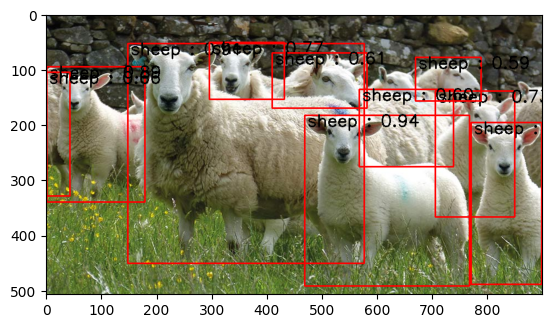

In [10]:
canvas = np.copy(img)

for p in predictions:
    x1, x2, y1, y2, label, label_confidence = p
    roi = img[y1:y2, x1:x2]

    color = (255, 0, 0)
    thickness = 2
    cv2.rectangle(canvas, (x1, y1), (x2, y2), color, thickness)

    text_position = (x1 + 5, y1 + 20)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_color = (0, 0, 0)
    font_thickness = 2

    cv2.putText(canvas, f"{label} : {label_confidence:.2f}", text_position, font, font_scale, font_color, font_thickness)

plt.imshow(canvas)